In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
npy_dir = '../../dataset/image_formation/20231007/npy_data'

# sample_pts = np.array([[10 + i*120, 50 + j*51] for j in range(10) for i in range(8)])
sample_pts = np.array([[10 + i*60, 50 + j*51] for j in range(10) for i in range(15)])
sample_pts_flatt = np.array([[sample_pts[i,0]+sample_pts[i,1]*890] for i in range(sample_pts.shape[0])]).squeeze()

wvl_list = np.array([430, 600, 610, 620, 640, 650, 660])

idx_list = np.array([3 + 8*i for i in range(10)])

## Max datas & Peak illum index

In [4]:
max_data_front = np.load(os.path.join(npy_dir, 'max_data_front.npy'))
max_data_mid = np.load(os.path.join(npy_dir, 'max_data_mid.npy'))
max_data_mid2 = np.load(os.path.join(npy_dir, 'max_data_mid2.npy'))
max_data_mid3 = np.load(os.path.join(npy_dir, 'max_data_mid3.npy'))
max_data_back = np.load(os.path.join(npy_dir, 'max_data_back.npy'))

In [5]:
front_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_front.npy'))
mid_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid.npy'))
mid2_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid2.npy'))
mid3_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid3.npy'))
back_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_back.npy'))

### Masking code

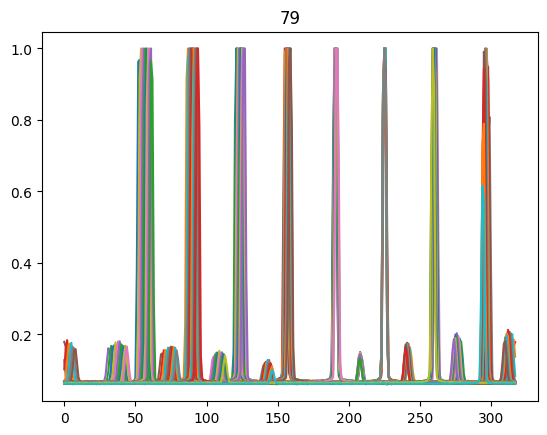

In [133]:
# w_idx = 2
# max_data_front_cp = max_data_back.copy()   
     
# medians = np.median(max_data_front_cp, axis=1)  # Find median along the second axis for each pixel and wavelength

# mask1 = (medians > 0.07) & (medians < 0.09)
# mask2 = medians >= 0.09
# mask3 = np.min(max_data_front_cp, axis=1) <= 0.06

# # Adjusting the masks to match the shape of max_data
# mask1 = mask1[:, np.newaxis, :]
# mask2 = mask2[:, np.newaxis, :]
# mask3 = mask3[:, np.newaxis, :]

# # Further broadcast the masks to the shape of max_data
# mask1_broadcasted = np.repeat(mask1, 318, axis=1)
# mask2_broadcasted = np.repeat(mask2, 318, axis=1)
# mask3_broadcasted = np.repeat(mask3, 318, axis=1)

# # Applying the conditions to update max_data
# max_data_front_cp[mask1_broadcasted] -= 0.02
# max_data_front_cp[mask2_broadcasted] -= 0.03
# max_data_front_cp[mask3_broadcasted] += 0.008
        
for idx, i in enumerate(sample_pts_flatt):
    # if idx in idx_list:
    #     plt.figure(figsize=(5,3))
    #     plt.ylim([0,0.08])
    #     if (np.median(max_data_front_cp[w_idx,:,i]) > 0.07) and (np.median(max_data_front_cp[w_idx,:,i]) < 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.02
    #     if (np.median(max_data_front_cp[w_idx,:,i]) >= 0.09):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] - 0.03
    #     if(max_data_front_cp[w_idx,:,i].min() <= 0.06):
    #         max_data_front_cp[w_idx,:,i] = max_data_front_cp[w_idx,:,i] + 0.008

        plt.plot(max_data_front_cp[w_idx,:,i]), plt.title(idx)

### Debug

In [6]:
max_data_front.shape, front_peak_illum_idx.shape

((7, 318, 516200), (3, 7, 516200))

In [9]:
# for idx, i in enumerate(sample_pts_flatt):
#     for w_idx, w in enumerate(wvl_list):
#         plt.figure()
#         plt.plot(max_data_front[w_idx,:,i]), plt.title('%dnm %d-th sample point, zero %d, minus %d, plus %d' %(w, idx, front_peak_illum_idx[1,w_idx,i], front_peak_illum_idx[0,w_idx,i], front_peak_illum_idx[2,w_idx,i]))

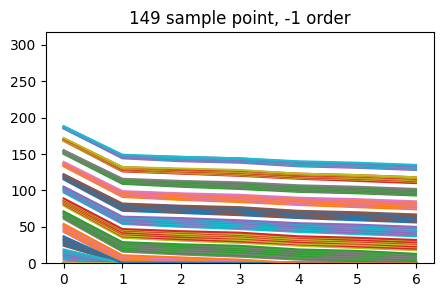

In [7]:
plt.figure(figsize=(5,3))
for idx, i in enumerate(sample_pts_flatt):
        plt.ylim([0,317])
        # plt.plot(back_peak_illum_idx[2,:,i]), plt.title('%d sample point, +1 order'%idx)
        plt.plot(back_peak_illum_idx[0,:,i]), plt.title('%d sample point, -1 order'%idx)
        # plt.plot(back_peak_illum_idx[1,:,i]), plt.title('%d sample point, 0 order'%idx)

#### Peak illum index Plotting

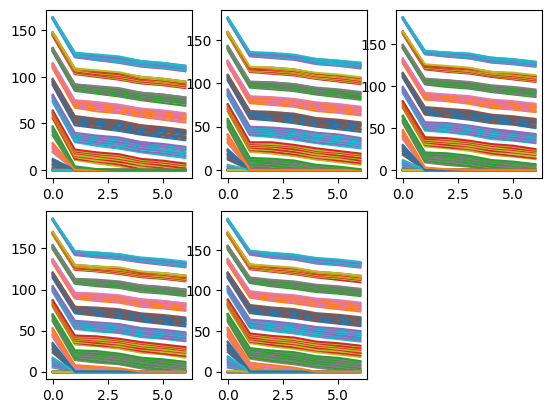

In [8]:
m_idx = 0
for i in range(len(sample_pts)):
    plt.subplot(231), plt.plot(front_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(232), plt.plot(mid_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(233), plt.plot(mid2_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(234), plt.plot(mid3_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(235), plt.plot(back_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])

## Depth Interpolation

### Depth interpolation linear / non-linear

In [7]:
all_position_peak_illum_idx = np.stack((front_peak_illum_idx, mid_peak_illum_idx, mid2_peak_illum_idx, mid3_peak_illum_idx, back_peak_illum_idx), axis = 0)

In [8]:
def get_depth(position):
        """
            bring depth values (mm) for each spectralon position
        """
        
        to_depth_dir = "../../dataset/image_formation/2023%s/%s_depth/spectralon"

        depth_dir = os.path.join(to_depth_dir%("1007", position), "2023%s_spectralon_%s.npy"%("1007", position))
        depth = np.load(depth_dir)[:,:,2].reshape(580 * 890) # only get z(=depth) value

        return depth

In [9]:
positions = ["front", "mid","mid2","mid3", "back"]
depth = np.array([get_depth(position) for position in positions]) * 1e+3

In [10]:
def fitting_function(x, a, b, c):
        """
            non-linear fitting function
        """
        return a*(x**b) + c

In [24]:
from scipy.optimize import curve_fit

m_list = np.array([-1, 0, 1])

depth_start = 600
depth_end = 900

depth_arange = np.arange(depth_start, depth_end + 1, 1)

# m = 0
# w = 1
# # i = sample_pts_flatt[2]
# i = 135650

depth_peak_illum_idx = np.zeros(shape=(len(depth_arange), len(m_list), len(wvl_list), len(sample_pts_flatt)))
depth_peak_illum_idx_linear = np.zeros(shape=(len(depth_arange), len(m_list), len(wvl_list), len(sample_pts_flatt)))

for m in range(len(m_list)):
        for w in range(len(wvl_list)): 
            for idx, i in enumerate(sample_pts_flatt):  
                depth_range = np.round(np.array([depth[p,i] for p in range(5)])).astype(np.int32)
                                
                # non linear fitting
                if all_position_peak_illum_idx[:,m,w,i].mean() < 1 : 
                    all_position_peak_illum_idx[:,m,w,i] = np.array([0, 0, 0, 0, 0])
                
                cnt_317 = np.count_nonzero(all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten().astype(np.int16) == 317)

                if (1< cnt_317 < 4):
                    final_depth = np.zeros(shape=(301,))
                    
                    total_cnt = cnt_317
                    
                    depth_range = depth_range[:(len(positions) - (total_cnt -1))]
                    idx_start = np.where(new_depth_range == depth_start)[0][0]
                    
                    y_val = all_position_peak_illum_idx[:,m,w,i].flatten()
                    y_val = y_val[:(len(positions) - (total_cnt -1))]
                    new_depth_range = np.arange(depth_range[0], depth_range[-1] + 1, 1) 
                    
                    params, cov = curve_fit(fitting_function, depth_range, y_val, maxfev = 500000)
                    interp_depth = fitting_function(new_depth_range, *params)
                    
                    if depth_range[-1] > 900:
                        idx_end= np.where(new_depth_range == depth_end)[0][0]
                        final_depth[:len(interp_depth[idx_start:idx_end])] = interp_depth[idx_start:idx_end]
                        
                    else:
                        final_depth[:len(interp_depth[idx_start:])] = interp_depth[idx_start:]
                        final_depth[len(interp_depth[idx_start:]):] =  interp_depth[-1]
                    
                else: 
                    y_val = all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten()
                    new_depth_range = np.arange(depth_range[0], depth_range[-1] + 1, 1) 
                    idx_start, idx_end = np.where(new_depth_range == depth_start)[0][0], np.where(new_depth_range == depth_end)[0][0]

                    params, cov = curve_fit(fitting_function, depth_range, all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten(), maxfev = 500000)
                    interp_depth = fitting_function(new_depth_range, *params)
                    final_depth = interp_depth[idx_start:idx_end+1]

                # polynom = np.interp(new_depth_range, depth_range, all_position_peak_illum_idx[:,m,w,i].reshape(len(depth_range)).flatten(), 6)

                depth_peak_illum_idx[:, m, w, idx] = final_depth 
                # depth_peak_illum_idx_linear[:, m, w, idx] = polynom[idx_start:idx_end+1]


c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


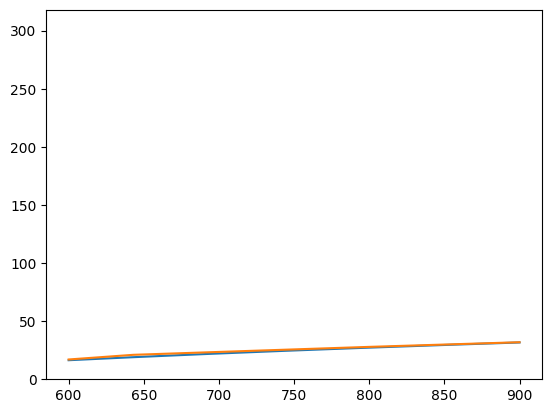

In [14]:
plt.ylim([0,318])
_ = plt.plot(depth_arange, depth_peak_illum_idx[:,0,2,23])
_ = plt.plot(depth_arange, depth_peak_illum_idx_linear[:,0,2,23])

## Depth peak illum idx

### Load depth peak illum idx

In [15]:
depth_peak_illum_idx = np.load(os.path.join(npy_dir,'depth_peak_illum_idx.npy'))

In [16]:
depth_peak_illum_idx.shape

(301, 3, 7, 150)

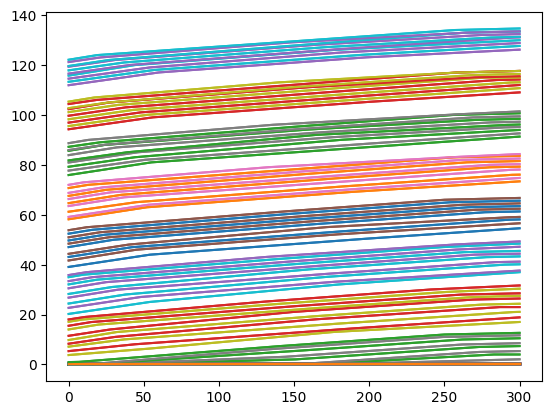

In [17]:
_ = plt.plot(depth_peak_illum_idx[:,0,6])
_ = plt.plot(depth_peak_illum_idx_linear[:,0,6])
# plt.plot(depth_peak_illum_idx[:,0,2,12])

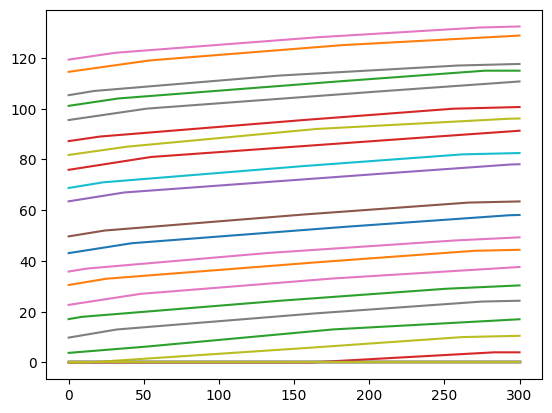

In [21]:
_ = plt.plot(depth_peak_illum_idx_linear[:,0,-1,::4])
_ = plt.plot(depth_peak_illum_idx[:,0,-1,0])

In [13]:
# for i in range(3):
#     for w_idx, w in enumerate(wvl_list):
#         plt.figure(figsize=(5,3))
#         plt.ylim([0, 318])
#         plt.plot(depth_peak_illum_idx[:,i,w_idx,3]), plt.title('%d order, %dnm'%(i, w))

In [25]:
depth_peak_illum_idx[0,0,:,22]

array([46.09302326,  2.69767442,  1.34883721,  0.        ,  0.        ,
        0.        ,  0.        ])

### Depth peak illum idx final

In [26]:
# depth_peak_illum_idx_final = np.load(os.path.join(npy_dir,'depth_peak_illum_idx_final.npy'))
depth_peak_illum_idx_final_linear = np.load(os.path.join(npy_dir,'depth_peak_illum_idx_final_linear.npy'))

In [27]:
depth_peak_illum_idx_final_linear.shape

(301, 2, 7, 150)

In [28]:
(depth_peak_illum_idx_final_linear == 317).sum()
# depth_peak_illum_idx_final[:,1,0,22]

2015

In [18]:
# for i in range(7):
#     plt.figure()
#     plt.plot(depth_peak_illum_idx_final[:,1,i,::3])

In [15]:
# for w_idx, w in enumerate(wvl_list):
#     plt.figure(figsize=(5,3))

#     plt.plot(depth_peak_illum_idx_final[:,1,w_idx,-4]), plt.title('%snm'%(w))

### diffs.npy

In [13]:
diffs = np.load(os.path.join(npy_dir, 'diffs.npy'))

In [14]:
diffs.min()

52.19821627843339

In [15]:
sample_pts[4]

array([250,  50])

52.689753769860545


(<matplotlib.image.AxesImage at 0x1e622804b08>,
 <matplotlib.colorbar.Colorbar at 0x1e6226a5708>)

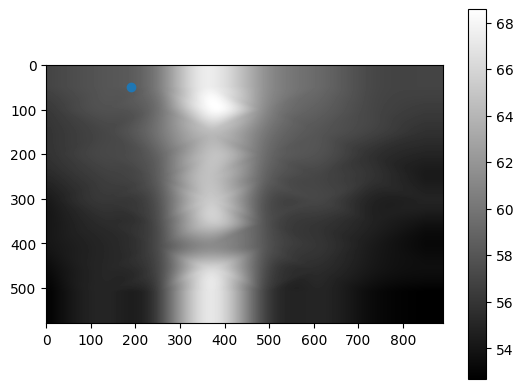

In [21]:
idx = 300

pts = 3
# plt.scatter(sample_pts[:,0],sample_pts[:,1])
plt.scatter(sample_pts[pts,0],sample_pts[pts,1])

print(diffs[idx].min())
plt.imshow(diffs[idx], cmap='gray'), plt.colorbar()

### diff interpolation

In [29]:
from scipy.interpolate import griddata, NearestNDInterpolator

cam_H, cam_W = 580, 890
def interpolation_diff_image(sample_pts, difference_430nm_660nm):
    """
        interpolate difference of 430nm and 660nm
    """
    diff_image_illum_idx = np.zeros(shape=(cam_H, cam_W))

    # Create a mesh grid for the image dimensions
    grid_y, grid_x = np.mgrid[0:cam_H, 0:cam_W]

    # Use griddata to interpolate
    interp_values_diffs = griddata(sample_pts, difference_430nm_660nm, (grid_x, grid_y), method='linear')

    # Step 2: Enhance the set of points and values using interpolated results
    y_coords, x_coords = np.where(~np.isnan(interp_values_diffs))
    enhanced_points = np.column_stack((y_coords, x_coords))
    enhanced_values = interp_values_diffs[~np.isnan(interp_values_diffs)]

    # Step 3: Extrapolate using the enhanced set of points and values
    interpolator = NearestNDInterpolator(enhanced_points, enhanced_values)
    extrapolated_values = interpolator(grid_y, grid_x)

    # Assign the interpolated values to the image (assuming you want to assign them to the first channel)
    diff_image_illum_idx[:, :] = extrapolated_values

    return diff_image_illum_idx

In [30]:
# for d in range(len(depth_arange)):
for d in range(200,201):
    difference_430nm_660nm = abs(depth_peak_illum_idx_final_linear[d,1,0] - depth_peak_illum_idx_final_linear[d,1,-1])

    # depth, m, wvl, sample pts
    # 만약에 반복되는 숫자가 있다면? cnt 0 and 318
    for i in range(len(sample_pts_flatt)):
        cnt_0 = np.count_nonzero(np.round(depth_peak_illum_idx_final_linear[d,1,:,i]).astype(np.int16) == 0)
        extra = np.count_nonzero(np.floor(depth_peak_illum_idx_final_linear[d,1,:,i]).astype(np.int16) == 1)
        cnt_0 += extra
        
        cnt_317 = np.count_nonzero(np.round(depth_peak_illum_idx_final_linear[d,1,:,i]).astype(np.int16) == 317)
        extra2 = np.count_nonzero(np.round(depth_peak_illum_idx_final_linear[d,1,:,i]).astype(np.int16) == 316)
        cnt_317 += extra2
        
        if (cnt_0 > 0) or (cnt_317 > 0):
            cnt_0 *= 2.5
            cnt_317 *= 2.5

        difference_430nm_660nm[i] += (cnt_0 + cnt_317)
        
    intp_diff = interpolation_diff_image(sample_pts, difference_430nm_660nm)
    

In [38]:
sample_pts[6]

array([370,  50])

In [35]:
depth_peak_illum_idx_final_linear[300,1,:,6]

array([266., 310., 315., 317., 317., 317., 317.])

In [37]:
all_position_peak_illum_idx[2,2,:,sample_pts_flatt[6]]

array([260., 304., 309., 312., 317., 317., 317.])

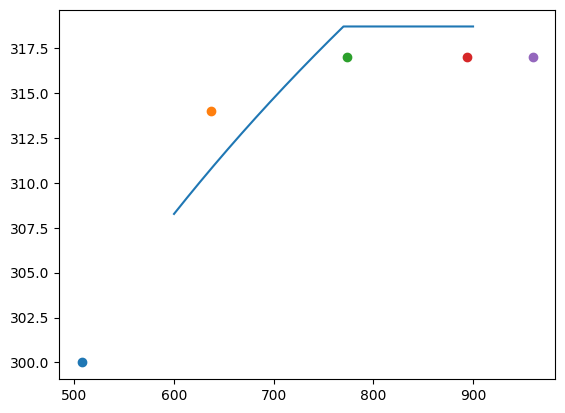

In [26]:
# plt.ylim([0,318])
pts = 6
plt.scatter(depth[0,sample_pts_flatt[3]],all_position_peak_illum_idx[0,2,-1,sample_pts_flatt[pts]])
plt.scatter(depth[1,sample_pts_flatt[3]],all_position_peak_illum_idx[1,2,-1,sample_pts_flatt[pts]])
plt.scatter(depth[2,sample_pts_flatt[3]],all_position_peak_illum_idx[2,2,-1,sample_pts_flatt[pts]])
plt.scatter(depth[3,sample_pts_flatt[3]],all_position_peak_illum_idx[3,2,-1,sample_pts_flatt[pts]])
plt.scatter(depth[4,sample_pts_flatt[3]],all_position_peak_illum_idx[4,2,-1,sample_pts_flatt[pts]])


plt.plot(depth_arange, depth_peak_illum_idx[:,2,-1,pts])
# plt.plot(depth_arange, depth_peak_illum_idx_linear[:,2,-1,pts])

In [135]:
depth_peak_illum_idx_final_linear[0,1,:,3]

array([248.8       , 291.12307692, 296.47692308, 299.47692308,
       304.15384615, 306.47692308, 309.47692308])

In [45]:
print(mid_peak_illum_idx[2,:,sample_pts_flatt[pts]])

[253. 295. 301. 304. 309. 311. 314.]


In [35]:
print(front_peak_illum_idx[2,:,sample_pts_flatt[pts]])
print(mid_peak_illum_idx[0,:,sample_pts_flatt[pts]])
print(back_peak_illum_idx[0,:,sample_pts_flatt[pts]])

[240. 283. 287. 290. 294. 297. 300.]
[31.  0.  0.  0.  0.  0.  0.]
[43.  0.  0.  0.  0.  0.  0.]


In [36]:
intp_diff[sample_pts[pts,1],sample_pts[pts,0]], pts

(54.39254270109814, 3)

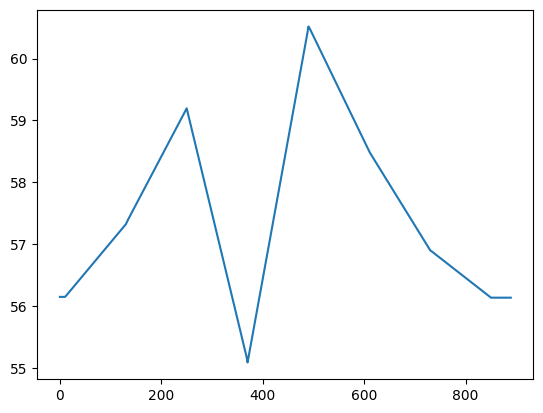

In [37]:
plt.plot(intp_diff[100,:])

52.54692511388566


(<matplotlib.image.AxesImage at 0x2386952ab08>,
 <matplotlib.colorbar.Colorbar at 0x2386952a988>)

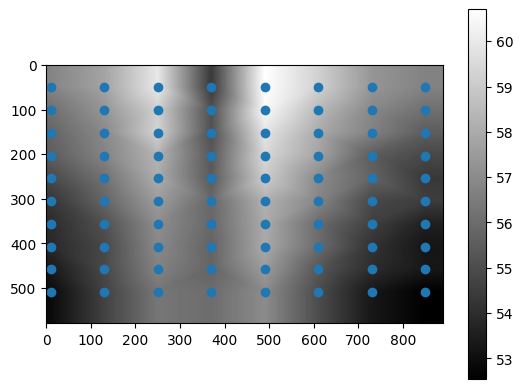

In [96]:
print(intp_diff.min())
plt.scatter(sample_pts[:,0], sample_pts[:,1])
plt.imshow(intp_diff, cmap='gray'), plt.colorbar()

52.689753769860545


(<matplotlib.image.AxesImage at 0x238b7342948>,
 <matplotlib.colorbar.Colorbar at 0x238b71f4208>)

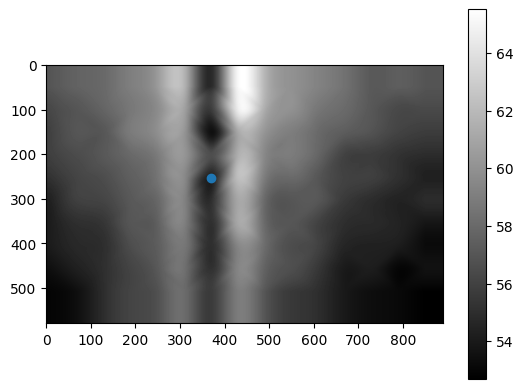

In [70]:
idx = 300

pts = 66
# plt.scatter(sample_pts[:,0],sample_pts[:,1])
plt.scatter(sample_pts[pts,0],sample_pts[pts,1])

print(diffs[idx].min())
plt.imshow(diffs[idx], cmap='gray'), plt.colorbar()

### Peak image illum idx

In [196]:
peak_image_illum_idx= np.load(os.path.join(npy_dir, 'peak_image_illum_idx.npy'))

In [197]:
peak_image_illum_idx.shape

(301, 2, 516200, 2)

In [202]:
peak_image_illum_idx_reshape = peak_image_illum_idx.reshape(301,2,580,890,2)

In [211]:
peak_image_illum_idx_reshape[130,1,260,420]

array([56.19582909, -0.43562039])

In [ ]:
depth_peak_illum_idx_final